In [1]:
import pandas as pd
import numpy as np
from  zipfile import ZipFile
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt 

# SEMMA (SAS)

## Metodología CRISPDM (Cross Industry Standard Process for Data Mining)

<img src='CRISPDM.jpeg'>

#### Link competencia
#### https://www.kaggle.com/competitions/titanic/data

In [2]:
zip0=ZipFile("titanic.zip",mode='r')
zip0.extractall()

In [3]:
train_df= pd.read_csv("train.csv")

In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.shape

(891, 12)

In [7]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

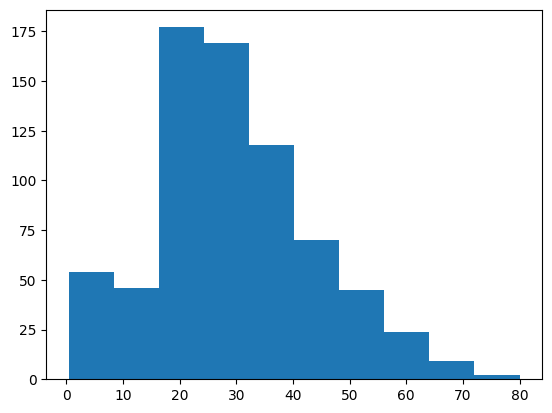

In [8]:
plt.hist(train_df['Age'])
plt.show()

In [9]:
train_df['Age'].dtype

dtype('float64')

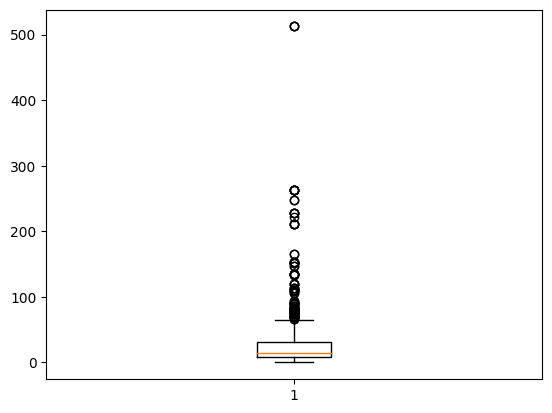

In [10]:
plt.boxplot(train_df['Fare'])
plt.show()

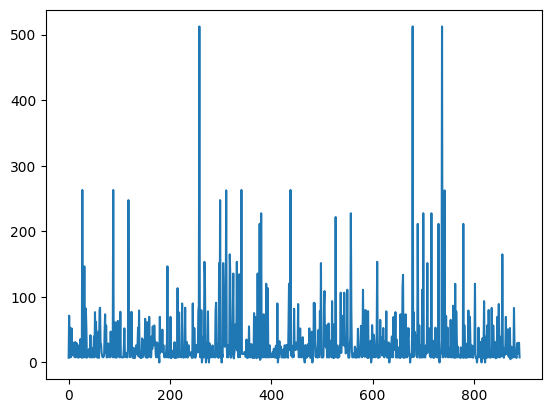

In [11]:
plt.plot(train_df['Fare'])
plt.show()

In [12]:
train_df.iloc[0,:]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [13]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Missing Values 

In [14]:
print("MISSIN VAlUES PERCENTAGE")
for i in enumerate(train_df.columns):
    print((i[1],sum(train_df[i[1]].isnull())/len(train_df[i[1]])))

MISSIN VAlUES PERCENTAGE
('PassengerId', 0.0)
('Survived', 0.0)
('Pclass', 0.0)
('Name', 0.0)
('Sex', 0.0)
('Age', 0.19865319865319866)
('SibSp', 0.0)
('Parch', 0.0)
('Ticket', 0.0)
('Fare', 0.0)
('Cabin', 0.7710437710437711)
('Embarked', 0.002244668911335578)


## Características de los datos de Titanic

<img src='titanic_notes.png'>



<img src='tinanic_notes_2.png'>

## LLenado de AGE

In [15]:
AGE_FILLER=train_df[['Sex','Age','Pclass','Parch','Embarked']].groupby(['Sex','Pclass','Parch','Embarked']).agg({'Age':np.nanmean})

In [16]:
AGE_FILLER

Age
Sex    Pclass Parch Embarked           
female 1      0     C         36.607143
                    Q         33.000000
                    S         34.960000
              1     C         40.571429
                    S         37.444444
              2     C         20.333333
                    S         22.800000
       2      0     C         21.800000
                    Q         30.000000
                    S         33.500000
              1     S         24.666667
              2     C         12.500000
                    S         22.222222
              3     S         39.000000
       3      0     C         14.750000
                    Q         19.687500
                    S         26.275000
              1     C         11.785714
                    Q         32.000000
                    S         16.769231
              2     C         15.000000
                    Q               NaN
                    S         13.312500
              3     C         24.000000
                    S         48.000000
              4     S         37.000000
              5     Q         39.000000
                    S         39.333333
              6     S         43.000000
male   1      0     C         39.880000
                    Q         44.000000
                    S         43.740385
              1     C         43.125000
                    S         45.333333
              2     C         34.000000
                    S         14.184000
              4     S         64.000000
       2      0     C         30.100000
                    Q         57.000000
                    S         33.554054
              1     C         31.000000
                    S         17.115385
              2     C         13.000000
                    S         24.443333
       3      0     C         27.285714
                    Q         37.000000
                    S         28.586111
              1     C         13.105000
                    Q         12.200000
                    S         16.944444
              2     S         10.884615
              3     S         16.000000
              4     S         40.000000
              5     S         39.000000

In [17]:
resp_=train_df.merge(right=AGE_FILLER,how='left',left_on=['Sex','Pclass','Parch','Embarked'],right_on=['Sex','Pclass','Parch','Embarked'])

In [18]:
resp_['Age_x'][resp_['Age_x'].isna()==True]=resp_['Age_y'][resp_['Age_x'].isna()==True]
resp_['Age_x'][resp_['Age_x'].isna()==True]=-1

/tmp/ipykernel_265588/4285108116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resp_['Age_x'][resp_['Age_x'].isna()==True]=resp_['Age_y'][resp_['Age_x'].isna()==True]
/tmp/ipykernel_265588/4285108116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resp_['Age_x'][resp_['Age_x'].isna()==True]=-1


In [19]:
resp_

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_y
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S,28.586111
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C,36.607143
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S,26.275000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S,34.960000
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S,28.586111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S,33.554054
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S,34.960000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,13.3125,1,2,W./C. 6607,23.4500,NaN,S,13.312500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C,39.880000


In [20]:
train_df=resp_

In [21]:
for i in train_df.columns:
    print((i,train_df[i].dtypes))

('PassengerId', dtype('int64'))
('Survived', dtype('int64'))
('Pclass', dtype('int64'))
('Name', dtype('O'))
('Sex', dtype('O'))
('Age_x', dtype('float64'))
('SibSp', dtype('int64'))
('Parch', dtype('int64'))
('Ticket', dtype('O'))
('Fare', dtype('float64'))
('Cabin', dtype('O'))
('Embarked', dtype('O'))
('Age_y', dtype('float64'))


### Modelado 

In [22]:
X=train_df[['PassengerId','Age_x','Pclass','Name','SibSp','Parch','Fare','Sex','Ticket','Embarked']]
y=train_df[['Survived']]

In [23]:
X.shape

(891, 10)

In [24]:
X.columns

Index(['PassengerId', 'Age_x', 'Pclass', 'Name', 'SibSp', 'Parch', 'Fare',
       'Sex', 'Ticket', 'Embarked'],
      dtype='object')

In [25]:
# X[numeric_vars+categorical_vars]

In [26]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_vars=['PassengerId','Age_x','Pclass','SibSp','Parch','Fare']
categorical_vars=['Name','Sex','Ticket','Embarked']

scale_step=('scaler',MinMaxScaler())
num_pipe=Pipeline([scale_step])
num_transformation=[('num_transformations',num_pipe,numeric_vars)]

encoder_step=('encoder',OneHotEncoder())
cat_pipe=Pipeline([encoder_step])
cat_transformation=[('cat_transformations',cat_pipe,categorical_vars)]

col_transformer=ColumnTransformer(transformers=num_transformation+cat_transformation)
col_transformer.fit(X[numeric_vars+categorical_vars])
X2=col_transformer.transform(X[numeric_vars+categorical_vars])



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

In [28]:
np.random.seed(1234)
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.2,random_state=1234)

In [29]:
RFC=RandomForestClassifier(random_state=1234)
params={
    'n_estimators':range(50,200,50),
    'max_depth': range(2,20),
    'criterion':['gini','entropy']

}
RFC_mod=GridSearchCV(RFC,param_grid=params,cv=5,n_jobs=6)
RFC_mod.fit(X_train,np.ravel(y_train))

pred_RFC_mod=RFC_mod.predict(X_test)

In [30]:
RFC_mod.best_params_

{'criterion': 'gini', 'max_depth': 17, 'n_estimators': 100}

In [31]:
RFC_mod.best_score_

0.8202009258347287

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score

In [33]:
print('Matriz de confusion:' , confusion_matrix(np.ravel(y_test),pred_RFC_mod))
print('Accuracy :' , accuracy_score(np.ravel(y_test),pred_RFC_mod))
print('Precision :' , precision_score(np.ravel(y_test),pred_RFC_mod))
print('Recall :' , recall_score(np.ravel(y_test),pred_RFC_mod))
print('AUC:' , roc_auc_score(np.ravel(y_test),pred_RFC_mod))

Matriz de confusion: [[107   2]
 [ 31  39]]
Accuracy : 0.8156424581005587
Precision : 0.9512195121951219
Recall : 0.5571428571428572
AUC: 0.7693971166448231


In [34]:
RFC_mod.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [35]:
RCF_adjusted=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=18,random_state=1234)
RCF_adjusted.fit(X_train,np.ravel(y_train))

RandomForestClassifier(criterion='entropy', max_depth=18, n_estimators=50,
                       random_state=1234)

In [36]:
importance=RCF_adjusted.feature_importances_



In [37]:
importance

array([2.78204729e-02, 4.89485125e-02, 8.05716477e-02, ...,
       4.65405494e-03, 1.38290817e-02, 3.91991170e-06])

In [38]:
print(len(RCF_adjusted.feature_importances_))

1584


In [39]:
feature_importance_tot=pd.DataFrame([i for i in enumerate(importance)])
feature_importance_tot.columns=['pos','importance']
feature_importance_tot.sort_values(by='importance',ascending=False,inplace=True)

In [40]:
feature_importance_tot[0:11]

,pos,importance
898,898,0.132315
897,897,0.095131
2,2,0.080572
5,5,0.076355
1,1,0.048949
0,0,0.027820
4,4,0.022483
3,3,0.018424
1582,1582,0.013829
1580,1580,0.013717


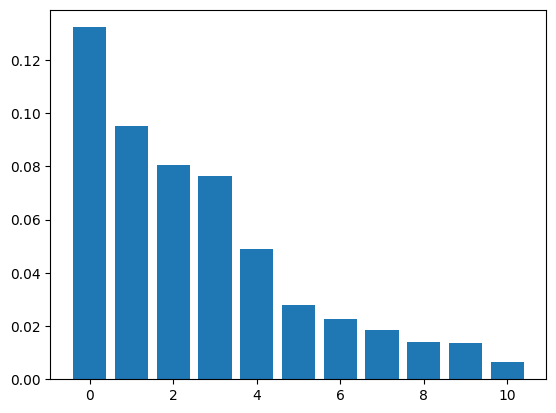

In [41]:
plt.bar(height=feature_importance_tot.iloc[0:11]['importance'],x=range(0,11))
plt.show()